Prove the convolution of a continuous distribution and a discrete distribution must have a continuous distribution


Consider two distributions: $d(x)$ which is discrete, and $c(y)$ which is continuous. The CDF of the convolution $F(z)$ is given by:

$$F(z) = \sum_{n} D(x_n)C(z-x_n)$$

while the PDF $f(z)$ is given by:

$$f(z) = \sum_{n} d(x_n)c(z-x_n)$$



$f(z)$ is continuous if for all $\epsilon > 0$, 
$$|a-b| < \epsilon$$ 
implies there exists $\delta > 0$ such that:

$$|f(a)-f(b)| < \delta$$

We have that $d(x_n) \le 1$ for all $x_n$, and $c(y) \le 1$ for all $y =x_n$

$d(x_n)$ being discrete also implies that $N$ is finite; that is:

$$d(x_n) \le M/N$$

for some finite $M$.

We then rearrange:

$$f(z) = \sum_{n} d(x_n)c(z-x_n) \le \sum_{n}\frac{M}{N}c(z-x_n) \le M\sum_{n}c(z-x_n)$$

$c(y)$ is continuous means that for all $\epsilon > 0$, 
$$|a-b| < \epsilon$$ 
implies there exists $\rho > 0$ such that:
$$|c(a)-c(b)| < \rho$$

So for all $a$, $b$, we have that: 

$$|f(a)-f(b)| = |\sum_{n} d(x_n)c(a-x_n) - \sum_{n} d(x_n)c(b-x_n)| \le M\sum_{n}|c(a-x_n)-c(b-x_n)| \le M\sum_{n}\rho$$

We choose $\delta = M\sum_{n}\rho$ and the proof is complete.

In [1]:
from scipy.stats import distributions as iid
from scipy.integrate import quad

In [2]:
import numpy as np

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
Omega = (-1,0,1)
Pr = (1/3.,1/2.,1/6.)

my_discrete_distrib1 = iid.rv_discrete(values=(Omega,Pr))

Omega = (1,2,4)
Pr = (1/2.,1/3.,1/6.)

my_discrete_distrib2 = iid.rv_discrete(values=(Omega,Pr))

In [5]:
#Question 2

In [6]:
class ConvolvedDiscreteAndDiscrete(iid.rv_discrete):
    """Convolve (add) a discrete rv x and a discrete rv s,
       returning the resulting cdf."""

    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        super(ConvolvedDiscreteAndDiscrete, self).__init__(name="ConvolvedDiscreteAndDiscrete")

        
    def pmf(self,z):
        # Start at 0
        F=0
        # Grab our random variables via self.
        y = self.Y
        x = self.X
        
        for k in range(len(y.xk)):
            # (starting at 0...) iteratively add P(x_n)*CDF(z-x_n)
            # is z-x_n in the y vector?
            if z - x.xk[k] in y.xk:
                # if so, return probability of that y:
                p_y = y.pk[np.where(y.xk == z - x.xk[k])] # np.where() returns the index where y.xk == z - x_n
            else:
                # if that is not in the y_n's, then the probability is 0.
                p_y = 0
            F = F + p_y*x.pk[k]
        return F       
    
    def cmf(self,z):
        # Start at 0
        F=0
        # Grab our random variables via self.
        y = self.Y
        x = self.X
        for k in range(len(x.xk)):
            F = F + y.cdf(z-x.xk[k])*x.pk[k]
        return F

     

In [7]:
my_convolution = ConvolvedDiscreteAndDiscrete(my_discrete_distrib1, my_discrete_distrib2)

In [8]:
my_convolution.cmf(5)

0.9999999999999999

In [9]:
my_convolution.pmf(3)

array([0.11111111])

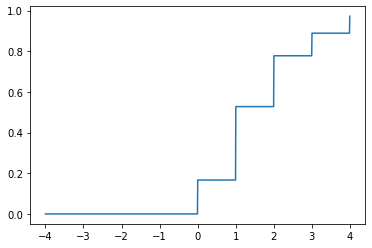

In [18]:
#graph to show it works !! (:
import plotly.graph_objects as go
import numpy as np

X = pd.Series(np.linspace(-4,4,1000).tolist())

fig, ax = plt.subplots()
ax.plot(X, X.apply(lambda z: my_convolution.cmf(z)))

In [ ]:
#Question 3

#note: this method only works well for distributions with well-defined integrals
#and with high probability mass density in a local part of the graph

In [19]:
my_continuous_distrib1 = iid.norm()
my_continuous_distrib2 = iid.norm(2,1)

In [27]:
class ConvolvedContinuousAndCont(iid.rv_continuous):
   
    y = np.linspace(-10,10,50).tolist()

    def __init__(self,f,s):
        self.continuous_rv = f
        self.discrete_rv = s
        super(ConvolvedContinuousAndCont, self).__init__(name="ConvolvedContinuousAndCont")
        
    def cmf(self,z):
        F=0
        s = self.discrete_rv
        x = self.continuous_rv
        integrand = lambda k,l: x.cdf(l-k)*s.pdf(k)
        bias = lambda l: quad(lambda k: integrand(k,l),a=-100, b=100)
        return bias(l=z)[0]

    def pmf(self,z):
        f=0
        s = self.discrete_rv
        x = self.continuous_rv
        integrand = lambda k,l: x.pdf(l-k)*s.pdf(k)
        bias = lambda l: quad(lambda k: integrand(k,l),a=-100, b=100)
        return bias(l=z)[0]


In [28]:
my_convolution = ConvolvedContinuousAndCont(my_continuous_distrib1, my_continuous_distrib2)
print(my_convolution.pmf(1))
print(iid.norm(0,1.414).pdf(1))
#checking some stuff (:

0.2196956447338613
0.21971223238070992


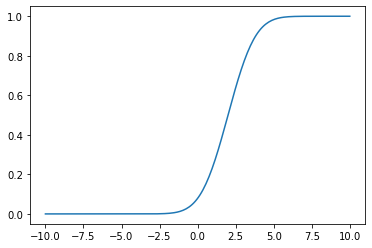

In [29]:
X = pd.Series(np.linspace(-10,10,200).tolist())

fig, ax = plt.subplots()
ax.plot(X, X.apply(lambda z: my_convolution.cmf(z)))

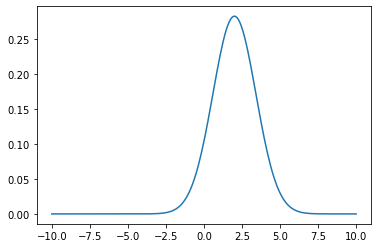

In [30]:
X = pd.Series(np.linspace(-10,10,200).tolist())

fig, ax = plt.subplots()
ax.plot(X, X.apply(lambda z: my_convolution.pmf(z)))